# Errors in numerical analysis - corrections

## Preamble: Notebook Shortcuts

* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* Esc + m: Markdown
* Esc + y: code
* Esc + a: cell above
* Esc + b: cell below
* CTRL + Enter: execute current cell
* CTRL + Shift + minus: split cell

## Documentation

* matplotlib: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/index.html
* numpy: https://numpy.org/doc/



## Exercise 1: Basic of Lagrange interpolation
We look for a polynomial function $P$ of degree $n$ which exactly matches the given points $(x_i,y_i)$. It writes $$ y_i = P(x_i), \quad \forall i\in\{0,n\}. $$

Between the points we have a polynomial function. This function is built from a linear combination of Lagrange polynomials $L_i$, which forms a basis of polynomials of degree $n$.  
The Lagrange polynomial interpolant then writes $$P_n(x) = \sum_{i=0}^n y_i L_i(x), \quad L_i(x) = \prod_{j=0, j \neq i}^{n} \frac{x-x_j}{x_i - x_j}.$$

Let us plot the Lagrange basis of our dataset

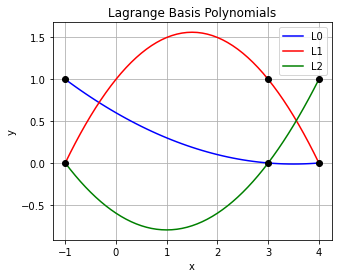

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

# data set
x = [-1, 3, 4]
y = [2, -3, 1]

#L1_coeff = [1,-1.5,.5]
#L2_coeff = [0, 2,-1]
#L3_coeff = [0,-.5,.5]

# get the polynomial function
#L1 = poly.Polynomial(L1_coeff) # L1_coeff[0] + L1_coeff[1]*X + L1_coeff[2]*X**2
#L2 = poly.Polynomial(L2_coeff)
#L3 = poly.Polynomial(L3_coeff)
L1 = lambda z : ((z-x[1])*(z-x[2])) / ((x[0]-x[1])*(x[0]-x[2]))
L2 = lambda z : ((z-x[0])*(z-x[2])) / ((x[1]-x[0])*(x[1]-x[2]))
L3 = lambda z : ((z-x[1])*(z-x[0])) / ((x[2]-x[1])*(x[2]-x[0]))

# continuous variable x_new
x_new = np.arange(x[0], x[-1]+0.1, 0.1)

fig = plt.figure(figsize = (5,4))
# plot the Lagrange basis functions
plt.plot(x_new, L1(x_new), "b", label = "L0")
plt.plot(x_new, L2(x_new), "r", label = "L1")
plt.plot(x_new, L3(x_new), "g", label = "L2")

# check the property L(x_i) = 1 if i=j, 0 if not
plt.plot(x, np.ones(len(x)), "ko", x, np.zeros(len(x)), "ko")
plt.title("Lagrange Basis Polynomials")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

from scipy.interpolate import lagrange
# compute the interpolant
P = lambda z : y[0]*L1(z) + y[1]*L2(z) + y[2]*L3(z)
# compare with the scipy built-in function
f = lagrange(x,y)


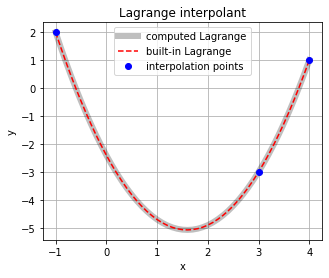

In [2]:
fig = plt.figure(figsize = (5,4))
plt.plot(x_new, P(x_new), "k-", label='computed Lagrange', linewidth=6, alpha=0.25) 
plt.plot(x_new, f(x_new), "r--", label = 'built-in Lagrange')
plt.plot(x, y, "bo", label = 'interpolation points')
plt.title("Lagrange interpolant")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise 2. Interpolating Runge function

This notebook demonstrates Lagrange interpolation of two functions: $ g(x) = \sin(5x) $ over $[0, \pi]$ and the Runge function $ f(x) = \frac{1}{1 + x^2} $ over different intervals, using equidistant and Chebyshev nodes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Define functions
def g(x):
    """Function g(x) = sin(5x)."""
    return np.sin(5 * x)

def runge(x):
    """Runge function f(x) = 1 / (1 + x^2)."""
    return 1 / (1 + 25*x**2)

# Error calculation function
def absolute_error(f, interpolant, x_vals):
    """Calculate the absolute error between a function f and its interpolant over x_vals."""
    return np.abs(f(x_vals) - interpolant(x_vals))

# Interpolation with equidistant nodes
def interpolate_equidistant(f, a, b, n):
    """Interpolate function f on [a, b] using n equidistant nodes."""
    x_equidistant = np.linspace(a, b, n)
    y_equidistant = f(x_equidistant)
    interpolant = lagrange(x_equidistant, y_equidistant)
    return interpolant

# Interpolation with Chebyshev nodes
def interpolate_chebyshev(f, a, b, n):
    """Interpolate function f on [a, b] using n Chebyshev nodes."""
    # Map Chebyshev nodes from [-1, 1] to [a, b]
    x_chebyshev = 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * np.arange(1, n+1) - 1) / (2 * n) * np.pi)
    y_chebyshev = f(x_chebyshev)
    interpolant = lagrange(x_chebyshev, y_chebyshev)
    return interpolant

In [4]:
# Define parameters
a_g, b_g = 0, np.pi  # Interval for g(x)
a_r, b_r = -1, 1     # Interval for Runge function
x_plot_g = np.linspace(a_g, b_g, 500)  # For error plot in [0, pi]
x_plot_r = np.linspace(a_r, b_r, 500)  # For error plot in [-5, 5]

# Interpolation orders to test
n_values = np.arange(2,21)

# Store errors for comparison
errors_g_equi, errors_g_cheb = [], []
errors_r_equi_a1, errors_r_cheb_a1 = [], []
errors_r_equi_a5, errors_r_cheb_a5 = [], []

# Perform interpolation for g(x)
for n in n_values:
    # Equidistant
    interp_g_equi = interpolate_equidistant(g, a_g, b_g, n)
    error_g_equi = absolute_error(g, interp_g_equi, x_plot_g)
    errors_g_equi.append(np.max(error_g_equi))

    # Chebyshev
    interp_g_cheb = interpolate_chebyshev(g, a_g, b_g, n)
    error_g_cheb = absolute_error(g, interp_g_cheb, x_plot_g)
    errors_g_cheb.append(np.max(error_g_cheb))

# Perform interpolation for Runge function
for n in n_values:
    # Equidistant
    interp_r_equi_a1 = interpolate_equidistant(runge, a_r, b_r, n)
    error_r_equi_a1 = absolute_error(runge, interp_r_equi_a1, x_plot_r)
    errors_r_equi_a1.append(np.max(error_r_equi_a1))

    # Chebyshev
    interp_r_cheb_a1 = interpolate_chebyshev(runge, a_r, b_r, n)
    error_r_cheb_a1 = absolute_error(runge, interp_r_cheb_a1, x_plot_r)
    errors_r_cheb_a1.append(np.max(error_r_cheb_a1))


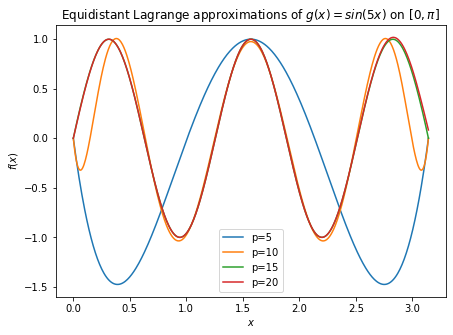

In [5]:
# Plot interpolations
plt.figure(figsize=(7,5))
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 5)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=5')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 10)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=10')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 15)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=15')
interp_g_equi = interpolate_equidistant(g, a_g, b_g, 20)
plt.plot(x_plot_g,interp_g_equi(x_plot_g),label='p=20')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Equidistant Lagrange approximations of $g(x) = sin(5x)$ on $[0, \pi]$");

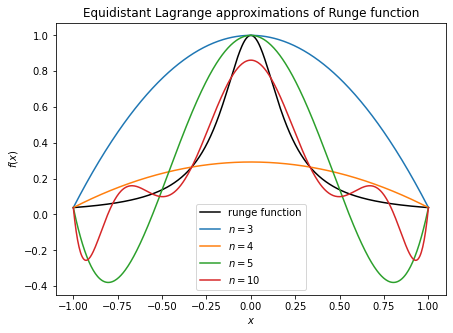

In [6]:
# Plot interpolations
plt.figure(figsize=(7,5))
plt.plot(x_plot_r,runge(x_plot_r),'k',label='runge function')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 3)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=3$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 4)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=4$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 5)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=5$')
interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 10)
plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='$n=10$')
#interp_r_equi = interpolate_equidistant(runge, a_r, b_r, 15)
#plt.plot(x_plot_r,interp_r_equi(x_plot_r),label='p=15')
plt.legend()
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Equidistant Lagrange approximations of Runge function");

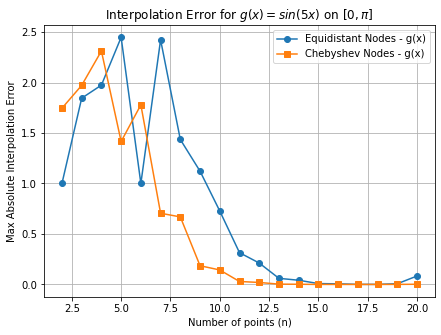

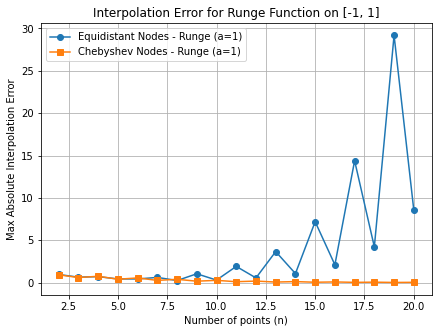

In [7]:
# Plot errors for g(x)
plt.figure(figsize=(7,5))
plt.plot(n_values, errors_g_equi, 'o-', label="Equidistant Nodes - g(x)")
plt.plot(n_values, errors_g_cheb, 's-', label="Chebyshev Nodes - g(x)")
plt.xlabel("Number of points (n)")
plt.ylabel("Max Absolute Interpolation Error")
plt.title("Interpolation Error for $g(x) = sin(5x)$ on $[0, \pi]$")
plt.legend()
plt.grid()
plt.show()

# Plot errors for Runge function with a=1
plt.figure(figsize=(7,5))
plt.plot(n_values, errors_r_equi_a1, 'o-', label="Equidistant Nodes - Runge (a=1)")
plt.plot(n_values, errors_r_cheb_a1, 's-', label="Chebyshev Nodes - Runge (a=1)")
plt.xlabel("Number of points (n)")
plt.ylabel("Max Absolute Interpolation Error")
plt.title("Interpolation Error for Runge Function on [-1, 1]")
plt.legend()
plt.grid()
plt.show()

## Exercise 3. Linear piecewise interpolation
Implement a piecewise interpolation for the set of points ${x_0, x_1, x_2} = {0, 1, 2}$ and data ${y_0, y_1, y_2} = {1, 3, 2}$. 
Generalize your code for an interval $I = [a, b]$ made of $(n + 1)$ sub-intervals, using a random set of data 
"numpy.random.rand(N points)".

In [8]:
from scipy.interpolate import CubicSpline

N = 6 # number of data points
xmin, xmax = 0., 1.5
xi = np.linspace(xmin, xmax, N)
yi = np.random.rand(N)
print("x data:", xi, "\n")
print("y data:", yi, "\n")

x data: [0.  0.3 0.6 0.9 1.2 1.5] 

y data: [0.32795022 0.07512119 0.69285733 0.11694856 0.61331933 0.21129614] 



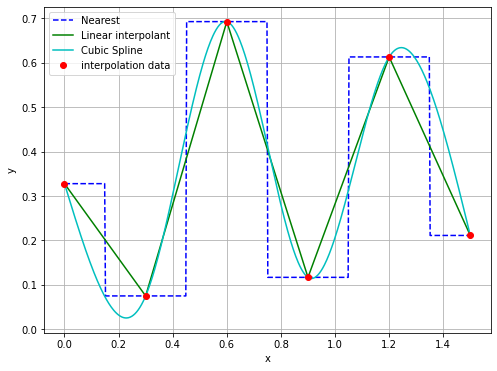

In [9]:
def interpolate(xi, yi, kind, N):
    y = np.zeros(N*(len(xi)-1))
    x = np.zeros(N*(len(xi)-1))
    
    def local_interp(x0, x1, y0, y1, kind, b, c, d):
        x_pw = np.linspace(x0, x1, N)
        f_interp = np.zeros(len(x_pw))

        if (kind == "nearest"):
            for j in range(len(x_pw)):
                if abs(x_pw[j] - x0) < abs(x_pw[j] - x1):
                    f_interp[j] = y0
                else:
                    f_interp[j] = y1
        elif (kind == "linear"):
            a = (y1-y0)/(x1-x0)
            f_interp = y0 + a*(x_pw-x0)

        else:
            raise Exception("method not known !")

        return x_pw, f_interp

    b = np.zeros(len(xi)-1)
    c = np.zeros(len(xi)-1)
    d = np.zeros(len(xi)-1)

    for i in range(len(xi)-1):
        x_pw, f_interp = local_interp(xi[i], xi[i+1], yi[i], yi[i+1], kind, b[i], c[i], d[i])
        x[i*N:(i+1)*N] = x_pw
        y[i*N:(i+1)*N] = f_interp
    
    return x, y

N_plot = 100
x, y_near = interpolate(xi, yi, "nearest", N_plot)
x, y_lin = interpolate(xi, yi, "linear", N_plot)
cs = CubicSpline(xi, yi, bc_type='natural')  
y_spline = cs(x)
plt.figure(figsize = (8,6))
plt.plot(x, y_near, "b--", label = "Nearest")
plt.plot(x, y_lin, "g-", label = "Linear interpolant")
plt.plot(x, y_spline, "c-", label = "Cubic Spline")
plt.plot(xi,yi, 'ro', label="interpolation data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Euclidean norm error (linear) is 1.7947624876242265
Euclidean norm error (splines) is 1.2189463090701957


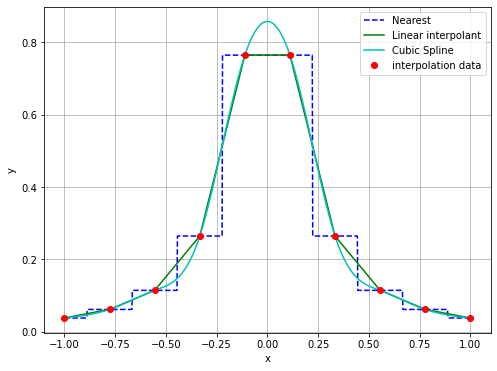

In [14]:
N = 10
xmin, xmax = -1, 1
xi = np.linspace(xmin, xmax, N)
yi = runge(xi)

x, y_near = interpolate(xi, yi, "nearest", N_plot)
x, y_lin = interpolate(xi, yi, "linear", N_plot)
cs = CubicSpline(xi, yi, bc_type='natural')  
y_spline = cs(x)

E2_lin = np.linalg.norm(y_lin-runge(x),ord=2)
print(f'Euclidean norm error (linear) is {E2_lin}')
E2_spline = np.linalg.norm(y_spline-runge(x),ord=2)
print(f'Euclidean norm error (splines) is {E2_spline}')


plt.figure(figsize = (8,6))
plt.plot(x, y_near, "b--", label = "Nearest")
plt.plot(x, y_lin, "g-", label = "Linear interpolant")
plt.plot(x, y_spline, "c-", label = "Cubic Spline")
plt.plot(xi,yi, 'ro', label="interpolation data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise 4. Least squares 

Using the monomial polynomial basis, form and solve the normal equations to fit a polynomial of degree n through the data given in the below Table


| t | 0.0 | 1.0 | 2.0| 3.0 |4.0| 5.0|
|:--|:--  |:--  |:-- |:--  |:--|:--|
| y | 1.0| 2.7| 5.8| 6.6| 7.5| 9.9|

You should write a function SolveLeastSquares in Python that returns the coefficients ($c_n$) from solving the 
normal equations. 
To solve the system you can call the built-in function numpy.linalg.solve. 
Compute the found minimum and comment your observations for different values of n. 
Print the condition number of the system with numpy.linalg.cond.

Redo the computations by generating a sinusoidal data set with ≈ 200 points, and add some random noise thanks 
to (for example) numpy.random.normal.

Degree: 1
Coefficients: [1.31904762 1.70571429]
Condition Number: 33.408162433440346
Minimum Value (Sum of Squared Residuals): 1.792761904761904

Degree: 2
Coefficients: [ 1.00357143  2.17892857 -0.09464286]
Condition Number: 1430.4270396740842
Minimum Value (Sum of Squared Residuals): 1.458357142857143

Degree: 3
Coefficients: [ 0.78968254  3.15568783 -0.62936508  0.0712963 ]
Condition Number: 105279.68833656494
Minimum Value (Sum of Squared Residuals): 1.128968253968254

Degree: 4
Coefficients: [ 0.9718254   0.11997354  2.63402778 -0.9912037   0.10625   ]
Condition Number: 12903314.043239089
Minimum Value (Sum of Squared Residuals): 0.20003968253968182

Degree: 5
Coefficients: [ 1.         -3.17833333  8.30416667 -4.2125      0.84583333 -0.05916667]
Condition Number: 3327986579.3736057
Minimum Value (Sum of Squared Residuals): 2.661517455513817e-23



Text(0.5, 1.0, 'Least squares data fitting')

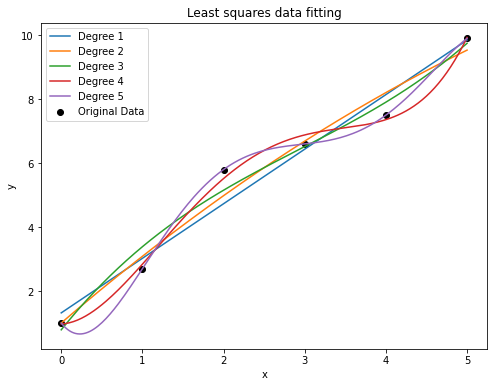

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def solve_least_squares(t, y, n):
    # Create the Vandermonde matrix for polynomial basis of degree n
    A = np.vander(t, N=n+1, increasing=True)
    
    # Formulate the normal equations
    ATA = A.T @ A
    ATy = A.T @ y
    
    # Solve for the coefficients
    coeffs = np.linalg.solve(ATA, ATy)
    
    # Calculate the condition number
    cond_number = np.linalg.cond(ATA)
    
    # Calculate the minimum found (sum of squared residuals)
    y_fit = A @ coeffs
    min_value = np.sum((y - y_fit)**2)
    
    return coeffs, cond_number, min_value

# Given data from Table 1
t = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([1.0, 2.7, 5.8, 6.6, 7.5, 9.9])

plt.figure(figsize = (8,6))

# Plot the original data points
plt.scatter(t, y, color='black', label="Original Data")

# Generate fine-grained t values for a smooth curve
t_fine = np.linspace(min(t), max(t), 200)

# Fit polynomials of different degrees
for degree in range(1, 6):
    coeffs, cond_number, min_value = solve_least_squares(t, y, degree)
    print(f"Degree: {degree}")
    print(f"Coefficients: {coeffs}")
    print(f"Condition Number: {cond_number}")
    print(f"Minimum Value (Sum of Squared Residuals): {min_value}\n")
    
    # Generate the polynomial approximation using the found coefficients
    y_fit = np.vander(t_fine, N=degree+1, increasing=True) @ coeffs
    
    # Plot the polynomial fit
    plt.plot(t_fine, y_fit, label=f"Degree {degree}")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Least squares data fitting')
    

Sinusoidal Data - Degree: 5
Coefficients: [ 0.0943213   0.82453543  0.21814969 -0.35247557  0.07762983 -0.00483929]
Condition Number: 6923380875.665739
Minimum Value (Sum of Squared Residuals): 1.9403824799083071


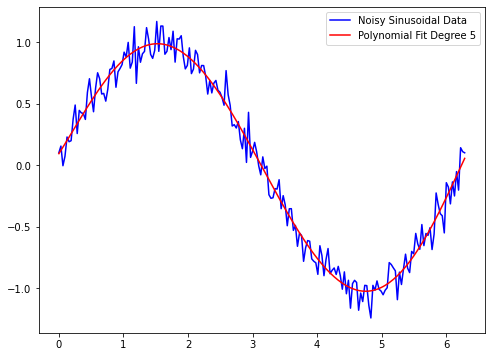

In [12]:
# Generate a sinusoidal dataset with noise
t_sin = np.linspace(0, 2 * np.pi, 200)
y_sin = np.sin(t_sin) + np.random.normal(0, 0.1, t_sin.shape)

# Fit a polynomial to the noisy sinusoidal data
degree_sin = 5  # You can experiment with different degrees
coeffs_sin, cond_number_sin, min_value_sin = solve_least_squares(t_sin, y_sin, degree_sin)
print(f"Sinusoidal Data - Degree: {degree_sin}")
print(f"Coefficients: {coeffs_sin}")
print(f"Condition Number: {cond_number_sin}")
print(f"Minimum Value (Sum of Squared Residuals): {min_value_sin}")

# Plot the fit for sinusoidal data
y_sin_fit = np.vander(t_sin, N=degree_sin+1, increasing=True) @ coeffs_sin
plt.figure(figsize = (8,6))
plt.plot(t_sin, y_sin, label="Noisy Sinusoidal Data", color='blue')
plt.plot(t_sin, y_sin_fit, label=f"Polynomial Fit Degree {degree_sin}", color='red')
plt.legend()
plt.show()

## Orbit

condition number: 473935.1033167458 


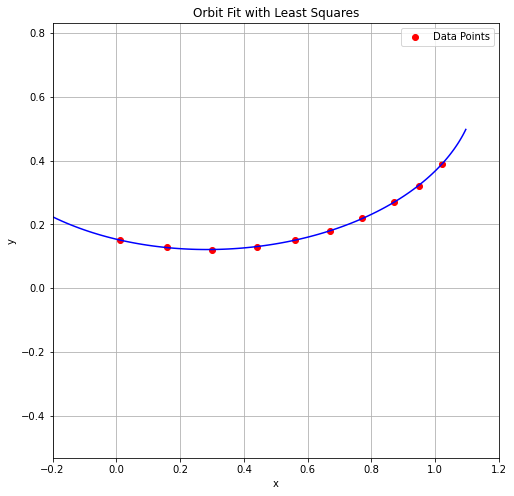

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points (10 observations)
x_data = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
y_data = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

# Construct matrix A and vector b for least squares fitting
A = np.column_stack([y_data**2, x_data * y_data, x_data, y_data, np.ones_like(x_data)])
b = x_data**2

# OPTION A - BUILT-IN 
# Solve for the 5 parameters [a, b, c, d, e] using least squares
#params, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

# OPTION B - HAND MADE
# Formulate the normal equations
ATA = A.T @ A
ATy = A.T @ b
params = np.linalg.solve(ATA, ATy)

# Calculate the condition number
cond_number = np.linalg.cond(ATA)
print(f'condition number: {cond_number} ')

# Generate orbit plot based on the obtained parameters
a, b, c, d, e = params
x_range = np.linspace(-0.2, 1.2, 100)
y_range = np.linspace(-0.2, 0.5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = a * Y**2 + b * X * Y + c * X + d * Y + e - X**2

# Plot original orbit and data points
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, levels=[0], colors='b')
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Orbit Fit with Least Squares')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

